# STATISTICAL ANALYSIS OF HEPATITIS DOMAIN FOR THE PARAMETERS SELECTION AND DATA ANALYSIS

### Finding Out
- The columns for training models
- Range Declaretion of that COlumns

In [28]:
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [29]:
names = ["class_","age", "sex", "sterioid", "antivirals", "fatigue","malaise", "anorexia","liver_big", "liver_firm", "spleen_palable","spiders", "ascities", "varices", "bilirubin","alk_phosphate", "sgot", "albumin","prothtime", "histology"]
df = pd.read_csv("hepatitis.data", names=names, index_col=None, sep=",", na_values="?")
df.head(n=4)

,class_,age,sex,sterioid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascities,varices,bilirubin,alk_phosphate,sgot,albumin,prothtime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1


In [30]:
df = df.fillna(value=0)
df.tail(n=7)

,class_,age,sex,sterioid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascities,varices,bilirubin,alk_phosphate,sgot,albumin,prothtime,histology
148,2,20,1,1.0,2,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.9,89.0,152.0,4.0,0.0,2
149,2,36,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,120.0,30.0,4.0,0.0,2
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,0.0,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,0.0,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,0.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2
154,1,43,1,2.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2


In [31]:
#List column variables in such Data types 

object_list = []
int_list = []
float_list = []
for col in df.columns:
    dataset_type = df[col].dtype
    #print("The ''{}'' is a holder of '{}'".format(col, dataset_type), end="\n")
    if dataset_type == "O":
        object_list.append(col)
    elif dataset_type == "int64":
        int_list.append(col)
    elif dataset_type == "float64":
        float_list.append(col)

print("Object List:{0}".format(object_list))
print("Integer List:{0}".format(int_list))
print("Float List:{0}".format(float_list))

Object List:[]
Integer List:['class_', 'age', 'sex', 'antivirals', 'histology']
Float List:['sterioid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascities', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'prothtime']


In [32]:
float_list_ = []
for col in float_list:
    if len(df[col].unique())!=3:
        float_list_.append(col)

# Continous Columns Distribution and Statistical Analysis

1.7486363095093873e-25


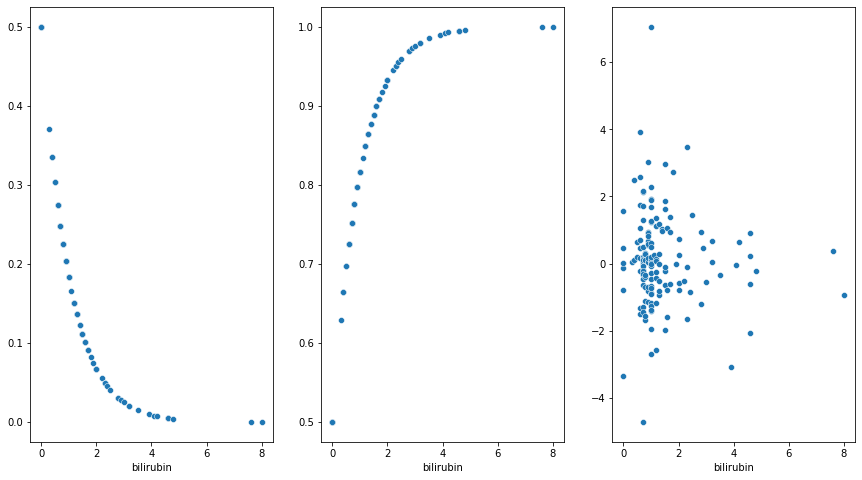

False
0.0008556004937240177


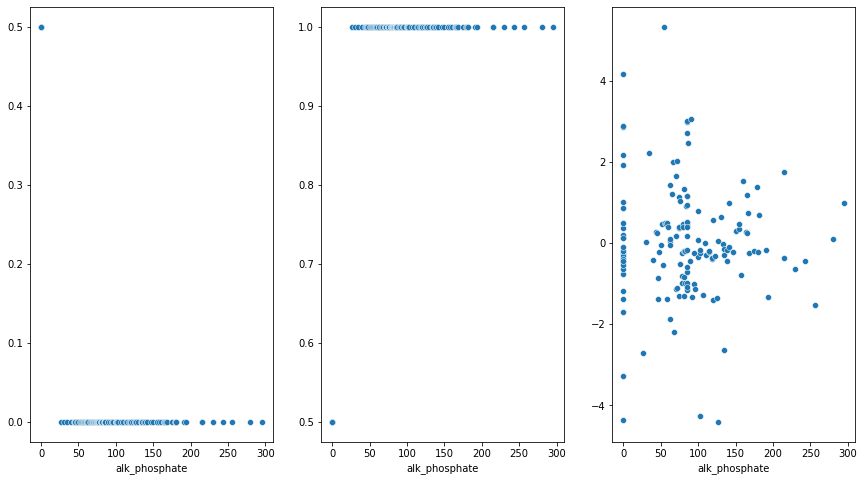

False
2.7397145651715166e-29


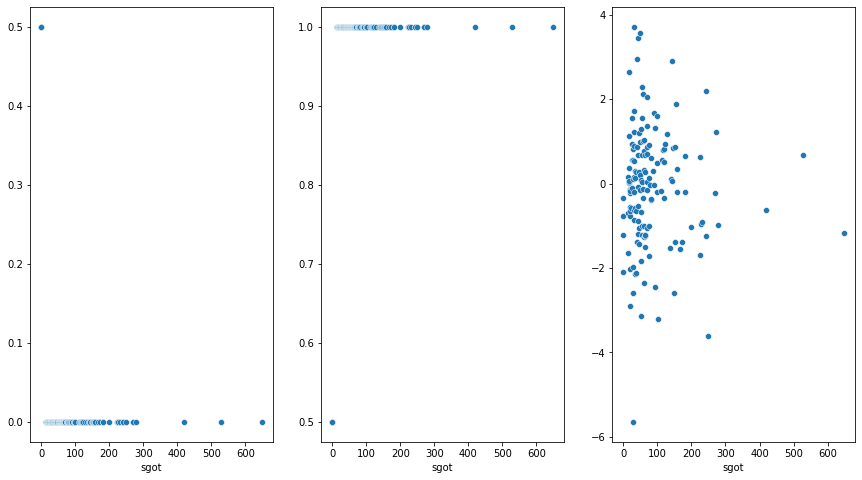

False
5.724894511905762e-12


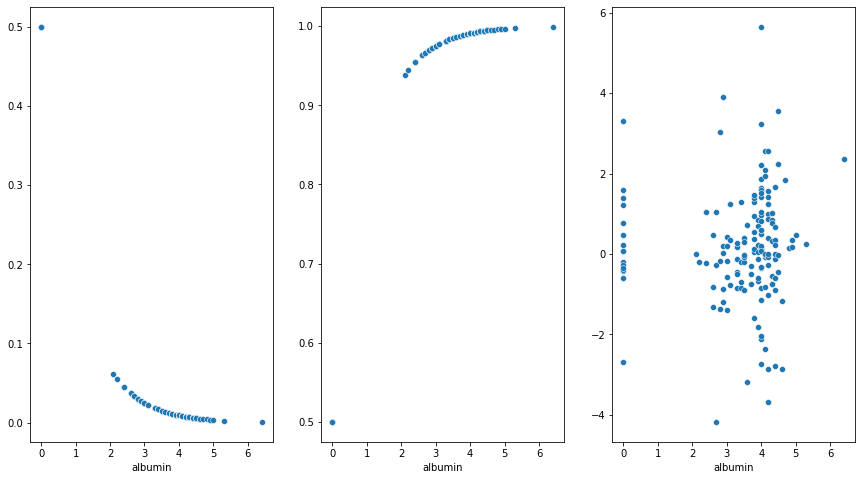

False
2.3791783340303505e-25


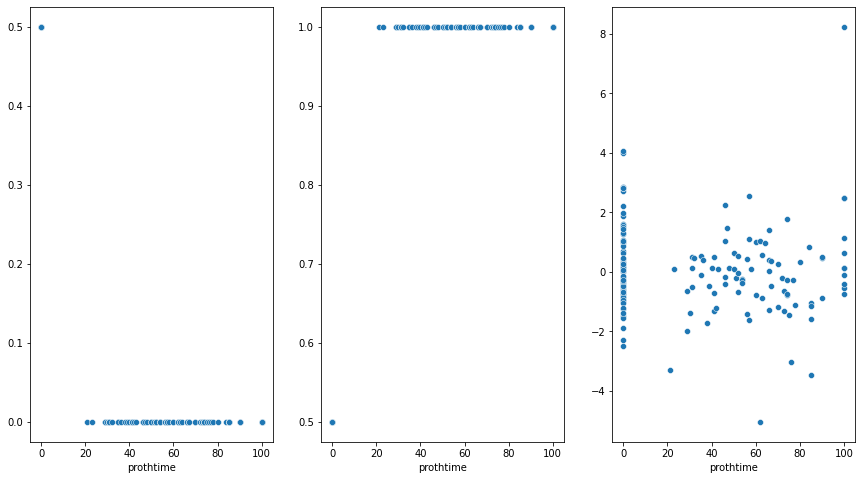

False


In [33]:
for col in float_list_:
    x_ = df[col].sort_values(ascending=True)
    x = x_.copy()
    normal_distribution_function = sc.laplace.pdf(x=x)
    normal_cumulative_distribution_function = sc.laplace.cdf(x=x)
    normal_distribution_random_variables = sc.laplace.rvs(size=x.shape[0])
    statistics_continous = sc.normaltest(x_)
    print(statistics_continous.pvalue)
    np.allclose(x_, normal_distribution_random_variables)
    plt.subplots(1,3, figsize=(20, 8))
    plt.subplot(141)
    sns.scatterplot(x=x_, y=normal_distribution_function)
    plt.subplot(142)
    sns.scatterplot(x=x_, y=normal_cumulative_distribution_function)
    plt.subplot(143)
    sns.scatterplot(x=x_, y=normal_distribution_random_variables)
    plt.show()
    print(np.allclose(x_, normal_distribution_random_variables))


# Discrete Columns Distribution and Statistical Analysis

In [34]:
float_list_.append('age')

0.043470381721207096


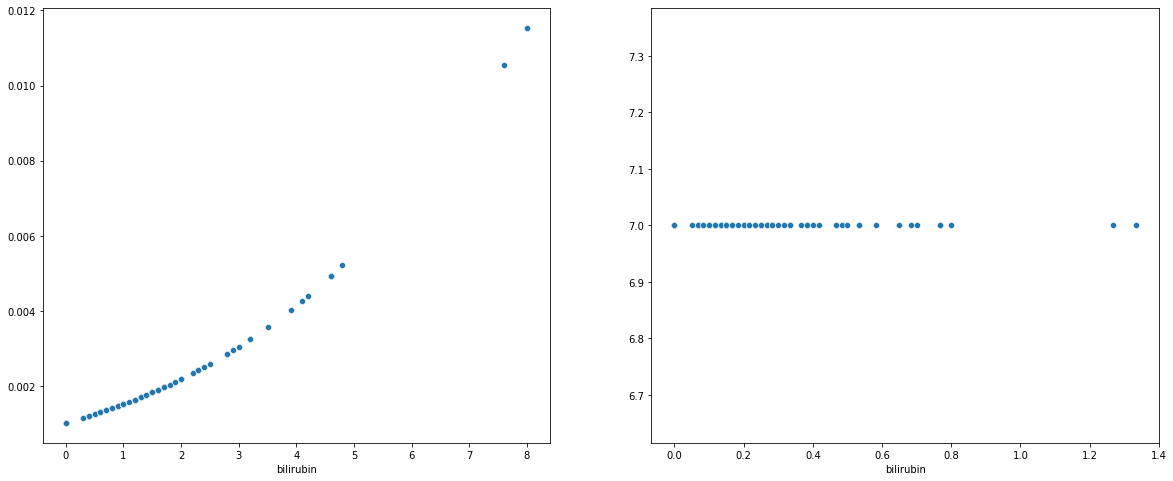

False


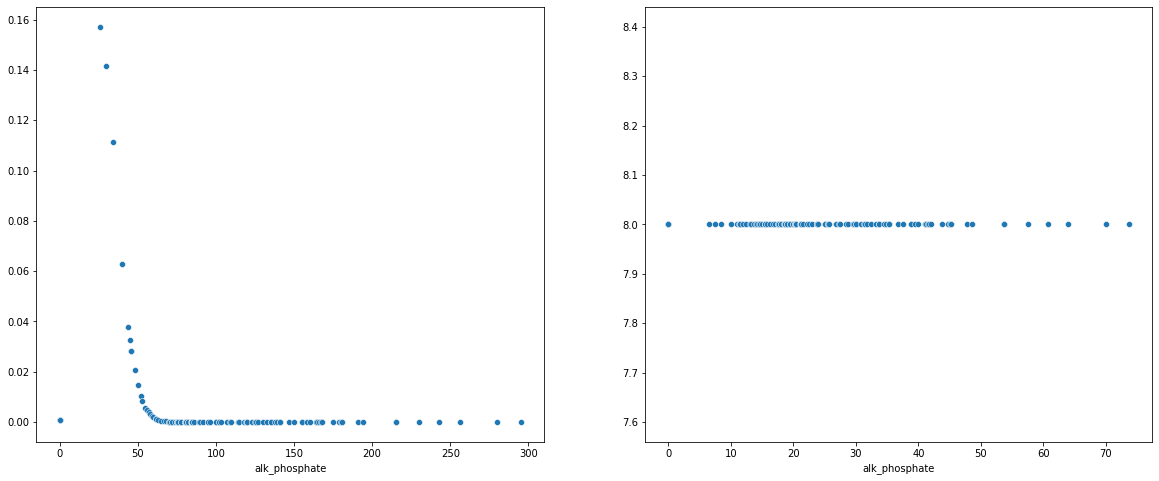

False


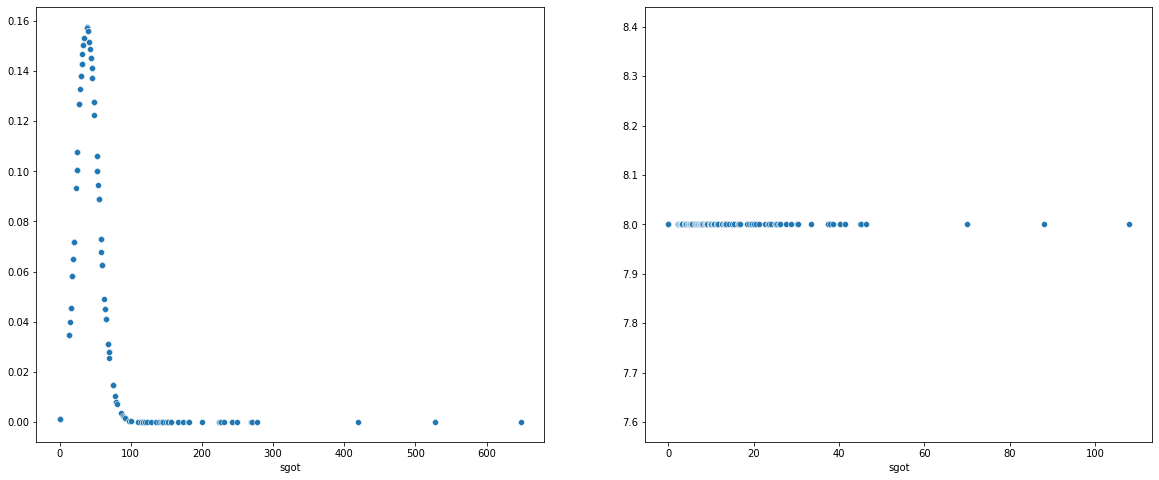

False


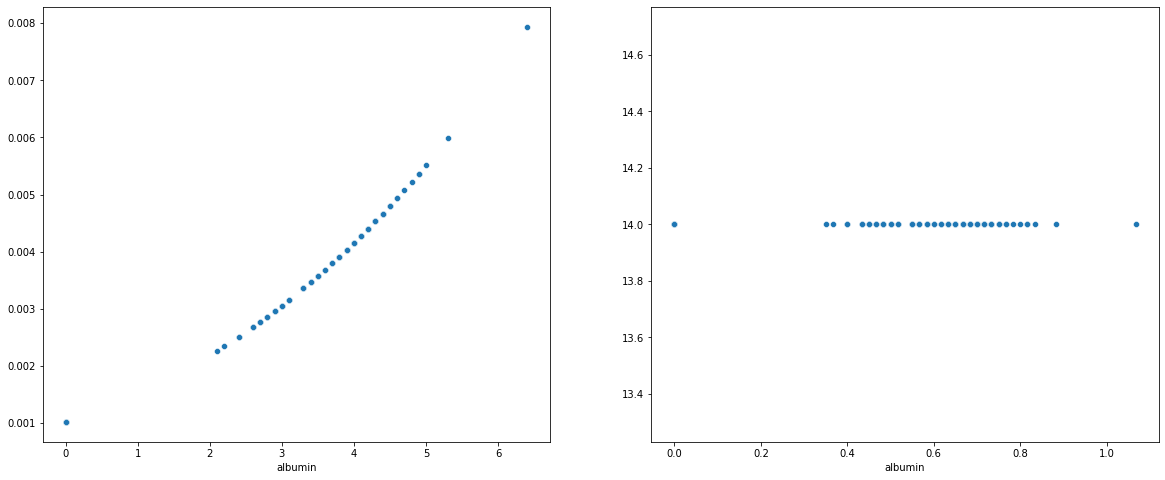

False


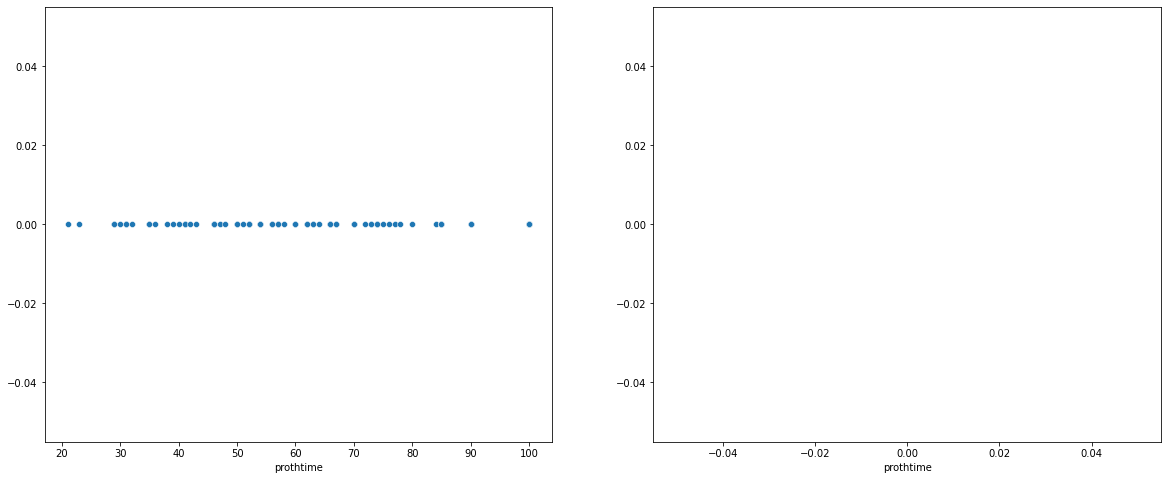

False


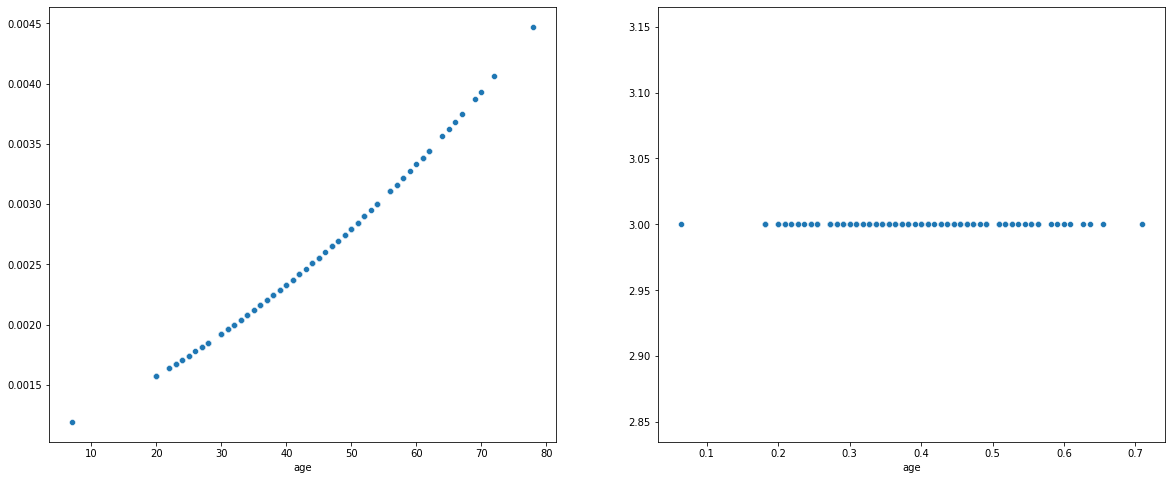

False


In [45]:
statistics_continous = sc.binomtest(3, n=155, p=0.005)
pvalue = statistics_continous.pvalue
print(pvalue)
for col in float_list_:
    x_ = df[col].sort_values(ascending=True)
    x = x_/np.argmin(df[col])
    binom_mass_function = sc.binom.pmf(k=x, n=x.shape[0], p= pvalue)
    binom_random_variables  = sc.binom.rvs(n=x.shape[0], p= pvalue)
    plt.subplots(1,2, figsize=(20, 8))
    plt.subplot(121)
    sns.scatterplot(x=x_, y=binom_mass_function)
    plt.subplot(122)
    sns.scatterplot(x=x, y=binom_random_variables)
    plt.show()
    print(np.allclose(x, binom_random_variables))

### Insights
- The dataset is hardly appropable for analysis. So, the model will not build a proper model. Because, the numerical columns are not properly identified. The reason is that a discrete or continous. So, Classification or Regression cannot give a peoper prediction. We needs to use clustering.